<h1 style="font-size: 35px; color: lightblue; text-align:center; font-weight: bolder;"> Bankruptcy Prediction: Artificial Neural Networks, Borderline SMOTE and Principal Component Analysis </h1>


<br>

<!-- Add font awesome icons -->
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/css/all.min.css" />
<script src="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/js/all.min.js"></script>

<!-- Contents -->
<a id="index" style="font-size: 28px; color: lightblue; font-weight:bolder; text-decoration: none;">Contents</a>
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<a href="#1" style="color:#033a91; font-size: 22px; text-decoration: none; font-weight:bold;">1. Importing data and libraries</a>

<a href="#2" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;">2. Exploratory Data Analysis (EDA)</a>
<ul style="color: #033a91">
    <li><a href="#2.1" style="color: #033a91; text-decoration: none;"> 2.1 Missing and Duplicate Data</a></li>
  <li><a href="#2.2" style="color: #033a91; text-decoration: none;">2.2 Class Distribution</a></li>
  <li><a href="#2.3" style="color: #033a91; text-decoration: none;">2.3 Outliers Treatment</a></li>
</ul>

<a href="#3" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;">3. Training and Scaling Data</a>

<a href="#4" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;">4. SMOTE Oversampling</a>

<a href="#5" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;">5. Baseline Model: Logistic Regression</a>

<a href="#6" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;">6. Model 1: 5-layer-ANN-SMOTE</a>
<ul style="color: #033a91">
    <li><a href="#6.1" style="color: #033a91; text-decoration: none;">6.1 Tuning the hyperparameters</a></li>
  <li><a href="#6.2" style="color: #033a91; text-decoration: none;">6.2 Building the model</a></li>
</ul>

<a href="#7" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;">7. Model 2: 6-layer-ANN-SMOTE</a>
<ul style="color: #033a91">
    <li><a href="#7.1" style="color: #033a91; text-decoration: none;">7.1 Tuning the hyperparameters</a></li>
  <li><a href="#7.2" style="color: #033a91; text-decoration: none;">7.2 Building the model</a></li>
</ul>

<a href="#8" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;">8. Model 3: 5-layer-ANN-PCA-BSM</a>
<ul style="color: #033a91">
    <li><a href="#8.1" style="color: #033a91; text-decoration: none;">8.1 PCA</a></li>
  <li><a href="#8.2" style="color: #033a91; text-decoration: none;">8.2 BSM Oversampling</a></li>
      <li><a href="#8.3" style="color: #033a91; text-decoration: none;">8.3 Tuning the hyperparameters</a></li>
    <li><a href="#8.4" style="color: #033a91; text-decoration: none;">8.4 Building the model</a></li>
</ul>

<br id="1">
<a href="#index" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;"> 1. Importing data and libraries </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">

In [3]:
pip install bayesian-optimization

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install --upgrade colorama

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, balanced_accuracy_score, recall_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import BorderlineSMOTE
import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint


2023-04-17 11:19:14.726102: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from keras.metrics import Recall, Precision
from numpy import float32

In [5]:
company = pd.read_csv("data.csv", index_col=False)


<br id="2">
<a href="#index" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;"> 2. Exploratory Data Analysis (EDA) </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">


<br id="2.1">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">  2.1 Missing and Duplicate Data<a>

In [6]:
#NaNs check

[print(col) for col in company if company[col].isna().sum() > 0]

[]

Despite the fact that we already know that there are no missing values (here it's pretty easy considering that we have just 96 features) it is important to computationally check that this is true, to avoid errors and time wasted in the following steps of the project.

In [7]:
#No Duplicate values

company.drop_duplicates(inplace=True) #no change in no. of datapoints

<br id="2.2">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;"> 2.2 Class Distribution</a>

In [8]:
target_counts = company['Bankrupt?'].value_counts()
print(target_counts)
print("")

#HEAVILY SKEWED as only 3.23% of the companies in this dataset are financially unstable / bankrupt

0    6599
1     220
Name: Bankrupt?, dtype: int64



<br id="2.3">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;"> 2.3 Outlier Treatment</a>

In [9]:
def outliers_treated(variable,variable_name,df):
    
    # 25th & 75th quartiles of the data
    low_qrt = np.percentile(variable, 25)
    up_qrt = np.percentile(variable, 75)
    print(f'Lower quartile (25%) is: {low_qrt} and Upper Quartile (75%) is: {up_qrt}')
    iqr_qrt = up_qrt - low_qrt
    print(f'iqr: {iqr_qrt}')
    
    cut_off_var = iqr_qrt * 1.5
    lower_var, upper_var = low_qrt - cut_off_var, up_qrt + cut_off_var
    print(f'Cut Off is: {cut_off_var}')
    print(variable_name +' Lower: {}'.format(lower_var))
    print(variable_name +' Upper: {}'.format(upper_var))
    
    outliers = [val for val in variable if val < lower_var or val > upper_var]
    print(f'For {variable_name},total outlier cases: {len(outliers)}')

    df = df.drop(df[(df[variable_name] > upper_var) | (df[variable_name] < lower_var)].index)
    print("")
    
    return df

for column in company:
    company_upd = outliers_treated(company[column],str(column),company)

Lower quartile (25%) is: 0.0 and Upper Quartile (75%) is: 0.0
iqr: 0.0
Cut Off is: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
For Bankrupt?,total outlier cases: 220

Lower quartile (25%) is: 0.476527080388047 and Upper Quartile (75%) is: 0.535562813825379
iqr: 0.05903573343733198
Cut Off is: 0.08855360015599797
 ROA(C) before interest and depreciation before interest Lower: 0.38797348023204903
 ROA(C) before interest and depreciation before interest Upper: 0.624116413981377
For  ROA(C) before interest and depreciation before interest,total outlier cases: 391

Lower quartile (25%) is: 0.53554295682512 and Upper Quartile (75%) is: 0.58915721761884
iqr: 0.05361426079372
Cut Off is: 0.08042139119058
 ROA(A) before interest and % after tax Lower: 0.45512156563454
 ROA(A) before interest and % after tax Upper: 0.66957860880942
For  ROA(A) before interest and % after tax,total outlier cases: 561

Lower quartile (25%) is: 0.527276620804112 and Upper Quartile (75%) is: 0.584105144815033
iqr:


Lower quartile (25%) is: 0.0007101336065656 and Upper Quartile (75%) is: 0.0014547594168788
iqr: 0.0007446258103132001
Cut Off is: 0.0011169387154698002
 Accounts Receivable Turnover Lower: -0.0004068051089042002
 Accounts Receivable Turnover Upper: 0.0025716981323486003
For  Accounts Receivable Turnover,total outlier cases: 659

Lower quartile (25%) is: 0.0043865304397204 and Upper Quartile (75%) is: 0.00897287558119175
iqr: 0.004586345141471349
Cut Off is: 0.006879517712207023
 Average Collection Days Lower: -0.002492987272486623
 Average Collection Days Upper: 0.015852393293398773
For  Average Collection Days,total outlier cases: 193

Lower quartile (25%) is: 0.0001728255554827 and Upper Quartile (75%) is: 4620000000.0
iqr: 4619999999.999827
Cut Off is: 6929999999.999741
 Inventory Turnover Rate (times) Lower: -6929999999.999568
 Inventory Turnover Rate (times) Upper: 11549999999.99974
For  Inventory Turnover Rate (times),total outlier cases: 0

Lower quartile (25%) is: 0.000233001


Lower quartile (25%) is: 0.276944242646329 and Upper Quartile (75%) is: 0.2814491856088265
iqr: 0.004504942962497482
Cut Off is: 0.006757414443746224
 Liability to Equity Lower: 0.2701868282025828
 Liability to Equity Upper: 0.2882066000525727
For  Liability to Equity,total outlier cases: 404

Lower quartile (25%) is: 0.0267911566924924 and Upper Quartile (75%) is: 0.026913184214613348
iqr: 0.00012202752212094742
Cut Off is: 0.00018304128318142113
 Degree of Financial Leverage (DFL) Lower: 0.02660811540931098
 Degree of Financial Leverage (DFL) Upper: 0.02709622549779477
For  Degree of Financial Leverage (DFL),total outlier cases: 1503

Lower quartile (25%) is: 0.565158395757604 and Upper Quartile (75%) is: 0.565724709506105
iqr: 0.0005663137485010239
Cut Off is: 0.0008494706227515358
 Interest Coverage Ratio (Interest expense to EBIT) Lower: 0.5643089251348524
 Interest Coverage Ratio (Interest expense to EBIT) Upper: 0.5665741801288565
For  Interest Coverage Ratio (Interest expense 

<br id="3">
<a href="#index"  style="color:#033a91; font-size: 22px; text-decoration: none; font-weight:bold;"> 3. Training and Scaling Data </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">


In [10]:
X = company_upd.drop('Bankrupt?', axis=1)
y = company_upd['Bankrupt?']

# Select the binary columns from the original dataframe
binary_cols = [' Liability-Assets Flag', ' Net Income Flag']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scale = StandardScaler()

# Reset the index of the original dataframe and the scaled features
X_train_reset = X_train.reset_index(drop=True) 

X_train_sc = pd.DataFrame(scale.fit_transform(X_train.drop(binary_cols, axis=1)), columns=X_train.drop(binary_cols,
                                                                                                       axis=1).columns)
X_train_scaled = X_train_sc.reset_index(drop=True)

X_train = pd.concat([X_train_scaled, X_train_reset[binary_cols]], axis=1)

# Reset the index of the original dataframe and the scaled features
X_test_reset = X_test.reset_index(drop=True)

X_test_sc = pd.DataFrame(scale.transform(X_test.drop(binary_cols, axis=1)), columns=X_test.drop(binary_cols, axis=1)
                         .columns)
X_test_scaled = X_test_sc.reset_index(drop=True)

X_test = pd.concat([X_test_scaled, X_test_reset[binary_cols]], axis=1)


In [11]:
X_train.isna().sum()

#NaNs check
[print(col) for col in X_train if X_train[col].isna().sum() > 0]

X_test.isna().sum()

#NaNs check
[print(col) for col in X_test if X_test[col].isna().sum() > 0]

[]

<br id="4">
<a href="#index" style="color:#033a91; font-size: 22px; text-decoration: none; font-weight:bold;"> 4. SMOTE Oversampling  </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">

In [12]:
# perform oversampling on the training data using SMOTE

sm1 = SMOTE(random_state=42)
X_train_bal1, y_train_bal1 = sm1.fit_resample(X_train, y_train)

In [13]:
target_counts = y_train_bal1.value_counts()
print(target_counts)

0    4228
1    4228
Name: Bankrupt?, dtype: int64


In [15]:
X_train_bal1.shape,X_test.shape,y_train_bal1.shape,y_test.shape

((8456, 95), (1881, 95), (8456,), (1881,))

<br id="5">
<a href="#index" style="color:#033a91; font-size: 22px; text-decoration: none; font-weight:bold;"> 5. Baseline Model: Logistic Regression </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">

In [30]:
#CELL 0

logreg3 = LogisticRegression()
logreg3.fit(X_train_bal1, y_train_bal1)

# Predict on the test set
logpred3 = logreg3.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, logpred3)
report = classification_report(y_test, logpred3)
print('Accuracy:', accuracy)
print('Classification Report:\n', report)
print(confusion_matrix(y_test, logpred3))
print("")
print("F1 Score ",f1_score(y_test, logpred3))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, logpred3))

Accuracy: 0.8904837852206273
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94      1824
           1       0.17      0.68      0.27        57

    accuracy                           0.89      1881
   macro avg       0.58      0.79      0.61      1881
weighted avg       0.96      0.89      0.92      1881

[[1636  188]
 [  18   39]]

F1 Score  0.2746478873239437
Balanced Accuracy Score  0.7905701754385965


<br id="6">
<a href="#index" style="color:#033a91; font-size: 22px; text-decoration: none; font-weight:bold;"> 6. Model 1: 5-layer-ANN-SMOTE </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">

In [25]:
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    P = K.sum(K.round(K.clip(y_true, 0, 1))) #what we call all truly possible positives: TP+FN
    P_ = K.sum(K.round(K.clip(y_pred, 0, 1))) #what we call all predicted positives: TP+FP
    precision = TP / (P_ + K.epsilon())
    recall = TP / (P + K.epsilon())
    f1_value = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_value

<br id="6.1">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">6.1 Tuning the hyperparameters</a>


In [45]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import fbeta_score

# Make scorer accuracy
f1_scorer = make_scorer(fbeta_score, beta=1)

def hypertuning_func1(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
    
    act_list = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu','elu', 'exponential', LeakyReLU,'relu']
    
    neurons = round(neurons)
    activation = act_list[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    
    opt_list = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    
    opt_dict= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    
    
    def temp_model1():
        opt = Adam(lr = learning_rate)
        model1 = Sequential()
        model1.add(Dense(neurons, input_dim=95, activation=activation))
        model1.add(Dense(neurons, activation=activation))
        model1.add(Dense(neurons, activation=activation))
        model1.add(Dense(neurons, activation=activation))
        model1.add(Dense(1, activation='sigmoid')) #this is the output layer where we only have 1 neuron (this is always sigmoid)
        model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=[get_f1])
        return model1
    
    model1 = KerasClassifier(build_fn=temp_model1, epochs=epochs, batch_size=batch_size,
                         verbose=0) #creates a Stratifiedstrat_fold object converting data into folds for cross-validation
    
    strat_fold = Stratifiedstrat_fold(n_splits=5, shuffle=True, random_state=123)
    
    score = cross_val_score(model1, X_train_bal1, y_train_bal1, scoring=f1_scorer, cv=strat_fold).mean()
    
    return score

# Set paramaters
params_range ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100)
}
# Run Bayesian Optimization
baye_opt1 = BayesianOptimization(hypertuning_func1, params_range, random_state=111)
baye_opt1.maximize(init_points=25, n_iter=4)


|   iter    |  target   | activa... | batch_... |  epochs   | learni... |  neurons  | optimizer |
-------------------------------------------------------------------------------------------------
53/53 [==============================] - 0s 2ms/step
| 1         | 0.4241    | 5.51      | 335.3     | 54.88     | 0.7716    | 36.58     | 1.044     |
53/53 [==============================] - 0s 2ms/step
| 2         | 0.4757    | 0.2023    | 536.2     | 39.09     | 0.3443    | 99.16     | 1.664     |
53/53 [==============================] - 1s 1ms/step
| 3         | 0.2666    | 0.7307    | 735.7     | 69.7      | 0.2815    | 51.96     | 0.8286    |
53/53 [==============================] - 0s 2ms/step
| 4         | 0.3999    | 0.6656    | 920.6     | 83.52     | 0.8422    | 83.37     | 6.937     |
53/53 [==============================] - 0s 2ms/step
| 5         | 0.9778    | 5.195     | 851.0     | 53.71     | 0.03717   | 50.87     | 0.7373    |
53/53 [==============================] - 0s 3ms/s

53/53 [==============================] - 0s 2ms/step
| 20        | 0.887     | 3.366     | 817.1     | 91.69     | 0.624     | 23.6      | 2.624     |
53/53 [==============================] - 0s 2ms/step
| 21        | 0.461     | 5.723     | 567.3     | 62.58     | 0.3588    | 69.39     | 3.336     |
53/53 [==============================] - 0s 2ms/step
| 22        | 0.8395    | 4.091     | 299.8     | 53.0      | 0.2804    | 41.21     | 6.821     |
53/53 [==============================] - 0s 2ms/step
| 23        | 0.1334    | 1.94      | 746.3     | 22.54     | 0.837     | 73.15     | 6.762     |
53/53 [==============================] - 0s 2ms/step
| 24        | 0.9195    | 5.326     | 373.9     | 77.54     | 0.04056   | 47.68     | 1.969     |
53/53 [==============================] - 0s 2ms/step
| 25        | 0.4       | 0.9562    | 541.1     | 87.25     | 0.1193    | 98.8      | 1.633     |
53/53 [==============================] - 0s 2ms/step
| 26        | 0.4318    | 5.764     | 854

In [46]:
tuned_params1 = baye_opt1.max['params']
act_list = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential', LeakyReLU,'relu']

tuned_params1['activation'] = act_list[round(tuned_params1['activation'])]
tuned_params1

{'activation': 'selu',
 'batch_size': 851.0135336291902,
 'epochs': 53.7054301919375,
 'learning_rate': 0.037173480215022196,
 'neurons': 50.872297884262295,
 'optimizer': 0.7372825972056519}

<br id="6.2">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">6.2 Building the model</a>

In [49]:
nn = Sequential()
nn.add(Dense(round(tuned_params1['neurons']), input_dim=95, activation=tuned_params1['activation']))
nn.add(Dense(round(tuned_params1['neurons']), activation=tuned_params1['activation']))
nn.add(Dense(round(tuned_params1['neurons']), activation=tuned_params1['activation']))

nn.add(Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer=Adam(lr = tuned_params1['learning_rate']), metrics=[get_f1])

history = nn.fit(X_train_bal1, y_train_bal1,batch_size=round(tuned_params1['batch_size']), 
                        epochs=round(tuned_params1['epochs']), validation_data=(X_test,y_test))
       

Epoch 1/54
10/10 [==============================] - 1s 69ms/step - loss: 2.6260 - get_f1: 0.6008 - val_loss: 1.4456 - val_get_f1: 0.1469
Epoch 2/54
10/10 [==============================] - 0s 15ms/step - loss: 0.4218 - get_f1: 0.8623 - val_loss: 0.3597 - val_get_f1: 0.2276
Epoch 3/54
10/10 [==============================] - 0s 16ms/step - loss: 0.2561 - get_f1: 0.9079 - val_loss: 0.2359 - val_get_f1: 0.2400
Epoch 4/54
10/10 [==============================] - 0s 19ms/step - loss: 0.2122 - get_f1: 0.9272 - val_loss: 0.2239 - val_get_f1: 0.2915
Epoch 5/54
10/10 [==============================] - 0s 12ms/step - loss: 0.1855 - get_f1: 0.9382 - val_loss: 0.2364 - val_get_f1: 0.3015
Epoch 6/54
10/10 [==============================] - 0s 12ms/step - loss: 0.1698 - get_f1: 0.9467 - val_loss: 0.2219 - val_get_f1: 0.3386
Epoch 7/54
10/10 [==============================] - 0s 13ms/step - loss: 0.1564 - get_f1: 0.9500 - val_loss: 0.2033 - val_get_f1: 0.3322
Epoch 8/54
10/10 [=======================

59/59 [==============================] - 0s 2ms/step


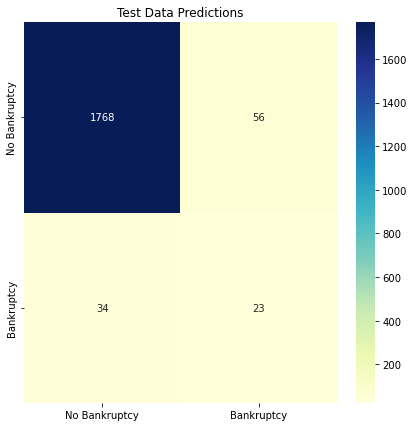



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1824
           1       0.29      0.40      0.34        57

    accuracy                           0.95      1881
   macro avg       0.64      0.69      0.66      1881
weighted avg       0.96      0.95      0.96      1881



In [50]:
def predict(model,x):
    pred  = model.predict(x)
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

def predict_graph(y_true,y_pred,title):
    cm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(7,7))
    sns.heatmap(cm,annot=True,fmt='g',cmap="YlGnBu",
                xticklabels=['No Bankruptcy','Bankruptcy'],yticklabels=['No Bankruptcy','Bankruptcy'])
    plt.title(title)
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_true,y_pred))


y_test_pred = predict(nn,X_test)
predict_graph(y_test,y_test_pred,'Test Data Predictions')


<br id="7">
<a href="#index" style="color:#033a91; font-size: 22px; text-decoration: none; font-weight:bold;"> 7. Model 2: 6-layer-ANN-SMOTE </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">

<br id="7.1">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">7.1 Tuning the hyperparameters</a>


In [26]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import fbeta_score

f1_scorer = make_scorer(fbeta_score, beta=1)

def hypertuning_func2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    
    act_list = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential', LeakyReLU,'relu']
    
    neurons = round(neurons)
    activation = act_list[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    
    opt_list = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    
    opt_dict= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    
    optimizer = opt_dict[opt_list[round(optimizer)]]
    
    def temp_model2():
        model2 = Sequential()
        model2.add(Dense(neurons, input_dim=95, activation=activation))
        if normalization > 0.5:
            model2.add(BatchNormalization())
        for i in range(layers1):
            model2.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            model2.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            model2.add(Dense(neurons, activation=activation))
        model2.add(Dense(1, activation='sigmoid'))
        model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[get_f1])
        return model2
    
    model2 = KerasClassifier(build_fn=temp_model2, epochs=epochs, batch_size=batch_size, verbose=0)
    
    strat_fold = Stratifiedstrat_fold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(model2, X_train_bal1, y_train_bal1, scoring=f1_scorer, cv=strat_fold).mean()
    
    return score

params_range2 ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
baye_opt2 = BayesianOptimization(hypertuning_func2, params_range2, random_state=111)
baye_opt2.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
53/53 [==============================] - 0s 3ms/step
| 1         | 0.2666    | 5.51      | 335.3     | 0.4361    | 0.2308    | 43.63     | 1.298     | 1.045     | 0.426     | 31.48     | 0.3377    | 6.935     |
53/53 [==============================] - 0s 3ms/step
| 2         | 0.4015    | 2.14      | 265.0     | 0.6696    | 0.1864    | 41.94     | 1.932     | 1.237     | 0.08322   | 91.07     | 0.794     | 5.884     |
53/53 [==============================] - 0s 2ms/step
| 3         | 0.0       | 7.337     | 992.8     | 0.5773    | 0.2441    | 53.71     | 1.055     | 1.908     | 0.1143    | 83.55     | 0.6977    | 3.957     |
53/53 [==============================] - 0s 2ms/ste

53/53 [==============================] - 0s 2ms/step
| 16        | 0.8897    | 1.051     | 209.3     | 0.9132    | 0.1537    | 87.45     | 1.19      | 2.607     | 0.07161   | 67.19     | 0.9688    | 2.782     |
53/53 [==============================] - 0s 2ms/step
| 17        | 0.4001    | 5.936     | 371.9     | 0.8899    | 0.296     | 79.09     | 2.283     | 1.504     | 0.4811    | 34.13     | 0.8683    | 1.868     |
53/53 [==============================] - 0s 2ms/step
| 18        | 0.4462    | 8.757     | 370.8     | 0.2978    | 0.221     | 21.03     | 1.06      | 2.468     | 0.5033    | 29.63     | 0.00893   | 5.955     |
53/53 [==============================] - 0s 4ms/step
| 19        | 0.9772    | 4.828     | 778.8     | 0.6616    | 0.2516    | 51.06     | 1.852     | 2.656     | 0.4743    | 83.8      | 0.01418   | 2.777     |
53/53 [==============================] - 0s 2ms/step
| 20        | 0.5334    | 1.155     | 294.5     | 0.206     | 0.2243    | 94.41     | 1.761     | 1.921

In [27]:
tuned_params2 = baye_opt2.max['params']
learning_rate = tuned_params2['learning_rate']
act_list = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']

tuned_params2['activation'] = act_list[round(tuned_params2['activation'])]
tuned_params2['batch_size'] = round(tuned_params2['batch_size'])
tuned_params2['epochs'] = round(tuned_params2['epochs'])
tuned_params2['layers1'] = round(tuned_params2['layers1'])
tuned_params2['layers2'] = round(tuned_params2['layers2'])
tuned_params2['neurons'] = round(tuned_params2['neurons'])

opt_list = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
opt_dict= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}

tuned_params2['optimizer'] = opt_dict[opt_list[round(tuned_params2['optimizer'])]]
tuned_params2

{'activation': 'softplus',
 'batch_size': 892,
 'dropout': 0.4820887768136817,
 'dropout_rate': 0.020802538234812772,
 'epochs': 49,
 'layers1': 2,
 'layers2': 2,
 'learning_rate': 0.18768999923061017,
 'neurons': 26,
 'normalization': 0.9491296024792569,
 'optimizer': <keras.optimizers.optimizer_v2.adamax.Adamax at 0x15ec4e610>}

<br id="7.2">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">7.2 Building the model</a>

In [31]:
from tensorflow.keras.optimizers import Adamax

model1 = Sequential()
model1.add(Dense(units=26, input_dim=95, activation='softplus'))
model1.add(BatchNormalization())
model1.add(Dense(units=26, activation='softplus'))
model1.add(Dense(units=26, activation='softplus'))
model1.add(Dense(units=26, activation='softplus'))
model1.add(Dense(units=26, activation='softplus'))
model1.add(Dropout(0.020802538234812772))
model1.add(Dense(units=1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer=Adamax(lr = 0.18768999923061017), metrics=[get_f1])

history1 = model1.fit(X_train_bal1, y_train_bal1,batch_size=892, epochs=49, validation_data=(X_test,y_test))

Epoch 1/49
10/10 [==============================] - 4s 57ms/step - loss: 0.6513 - get_f1: 0.7030 - val_loss: 0.6468 - val_get_f1: 0.1743
Epoch 2/49
10/10 [==============================] - 0s 19ms/step - loss: 0.5676 - get_f1: 0.8169 - val_loss: 0.6057 - val_get_f1: 0.1826
Epoch 3/49
10/10 [==============================] - 0s 15ms/step - loss: 0.4947 - get_f1: 0.8368 - val_loss: 0.5545 - val_get_f1: 0.1947
Epoch 4/49
10/10 [==============================] - 0s 13ms/step - loss: 0.4251 - get_f1: 0.8555 - val_loss: 0.5291 - val_get_f1: 0.1927
Epoch 5/49
10/10 [==============================] - 0s 14ms/step - loss: 0.3781 - get_f1: 0.8594 - val_loss: 0.5098 - val_get_f1: 0.1953
Epoch 6/49
10/10 [==============================] - 0s 16ms/step - loss: 0.3453 - get_f1: 0.8664 - val_loss: 0.4918 - val_get_f1: 0.1983
Epoch 7/49
10/10 [==============================] - 0s 18ms/step - loss: 0.3292 - get_f1: 0.8673 - val_loss: 0.4395 - val_get_f1: 0.2176
Epoch 8/49
10/10 [=======================

59/59 [==============================] - 0s 2ms/step


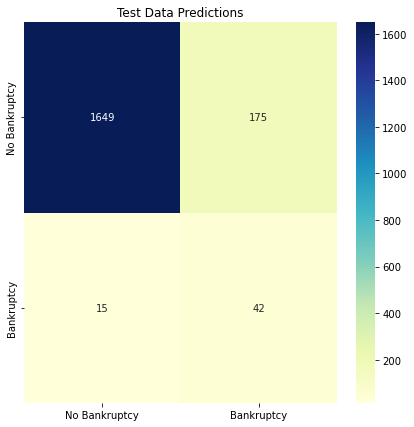



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.95      1824
           1       0.19      0.74      0.31        57

    accuracy                           0.90      1881
   macro avg       0.59      0.82      0.63      1881
weighted avg       0.97      0.90      0.93      1881



In [32]:
def predict(model,x):
    pred  = model.predict(x)
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

def predict_graph(y_true,y_pred,title):
    cm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(7,7))
    sns.heatmap(cm,annot=True,fmt='g',cmap="YlGnBu",
                xticklabels=['No Bankruptcy','Bankruptcy'],yticklabels=['No Bankruptcy','Bankruptcy'])
    plt.title(title)
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_true,y_pred))


y_test_pred = predict(model1,X_test)
predict_graph(y_test,y_test_pred,'Test Data Predictions')

<br id="8">
<a href="#index" style="color:#033a91; font-size: 22px; text-decoration: none; font-weight:bold;"> 8. Model 3: 5-layer-ANN-PCA-BSM </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">

<br id="8.1">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">8.1 PCA</a>


In [37]:
# Perform PCA (90%)
pca = PCA(n_components=0.90)  # WE DO THIS TO PREVENT OVERFITTING
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

<br id="8.2">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">8.2 BSM Oversampling</a>


In [38]:
# Perform oversampling on the training data using Borderline SMOTE

sm2 = BorderlineSMOTE(random_state=42)
X_train_bal2, y_train_bal2 = sm2.fit_resample(X_train_pca, y_train)

In [41]:
target_counts = y_train_bal2.value_counts()
print(target_counts)

0    4228
1    4228
Name: Bankrupt?, dtype: int64


In [40]:
X_train_bal2.shape,X_test_pca.shape,y_train_bal2.shape,y_test.shape

((8456, 41), (1881, 41), (8456,), (1881,))

<br id="8.3">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">8.3 Tuning the hyperparameters</a>


In [44]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import fbeta_score

f1_scorer = make_scorer(fbeta_score, beta=1)

def hypertuning_func3(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
    
   
    act_list = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential', LeakyReLU,'relu']
    
    neurons = round(neurons)
    activation = act_list[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    
    opt_list = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    
    opt_dict= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    
    
    def temp_model3():
        opt = Adam(lr = learning_rate)
        model3 = Sequential()
        model3.add(Dense(neurons, input_dim=41, activation=activation))
        model3.add(Dense(neurons, activation=activation))
        model3.add(Dense(1, activation='sigmoid')) 
        model3.compile(loss='binary_crossentropy', optimizer=opt, metrics=[get_f1])
        return model3
    
    model3 = KerasClassifier(build_fn=temp_model3, epochs=epochs, batch_size=batch_size,
                         verbose=0) #creates a Stratifiedstrat_fold object converting data into folds for cross-validation
    
    strat_fold = Stratifiedstrat_fold(n_splits=5, shuffle=True, random_state=123)
    
    score = cross_val_score(model3, X_train_bal2, y_train_bal2, scoring=f1_scorer, cv=strat_fold).mean()
    
    return score

# Set paramaters
params_range3 ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100)
}
# Run Bayesian Optimization
baye_opt3 = BayesianOptimization(hypertuning_func3, params_range3, random_state=111)
baye_opt3.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  epochs   | learni... |  neurons  | optimizer |
-------------------------------------------------------------------------------------------------
53/53 [==============================] - 0s 2ms/step


| 1         | 0.8415    | 5.51      | 335.3     | 54.88     | 0.7716    | 36.58     | 1.044     |
53/53 [==============================] - 0s 2ms/step


| 2         | 0.9615    | 0.2023    | 536.2     | 39.09     | 0.3443    | 99.16     | 1.664     |
53/53 [==============================] - 0s 2ms/step


| 3         | 0.3907    | 0.7307    | 735.7     | 69.7      | 0.2815    | 51.96     | 0.8286    |
53/53 [==============================] - 0s 2ms/step


| 4         | 0.1333    | 0.6656    | 920.6     | 83.52     | 0.8422    | 83.37     | 6.937     |
53/53 [==============================] - 0s 2ms/step


| 5         | 0.9834    | 5.195     | 851.0     | 53.71     | 0.03717   | 50.87     | 0.7373    |
53/53 [==============================] - 0s 1ms/step


| 6         | 0.0       | 7.355     | 758.2     | 65.22     | 0.2815    | 99.86     | 0.9663    |
53/53 [==============================] - 0s 1ms/step


| 7         | 0.8876    | 5.539     | 588.0     | 52.4      | 0.7306    | 39.05     | 2.804     |
53/53 [==============================] - 0s 1ms/step


| 8         | 0.9331    | 2.871     | 957.8     | 93.5      | 0.8157    | 13.07     | 6.604     |
53/53 [==============================] - 0s 2ms/step


| 9         | 0.8047    | 8.554     | 845.3     | 58.5      | 0.9671    | 47.53     | 2.232     |
53/53 [==============================] - 0s 3ms/step


| 10        | 0.964     | 0.148     | 230.5     | 24.25     | 0.1367    | 13.0      | 1.585     |
53/53 [==============================] - 0s 2ms/step


| 11        | 0.9678    | 4.895     | 342.9     | 34.35     | 0.1581    | 71.47     | 3.283     |
53/53 [==============================] - 0s 2ms/step


| 12        | 0.0       | 6.914     | 735.1     | 55.3      | 0.5993    | 51.55     | 6.743     |
53/53 [==============================] - 0s 2ms/step


| 13        | 0.8415    | 1.33      | 925.5     | 59.83     | 0.5966    | 71.62     | 1.242     |
53/53 [==============================] - 0s 1ms/step


| 14        | 0.9276    | 7.782     | 585.7     | 25.55     | 0.3711    | 42.54     | 3.304     |
53/53 [==============================] - 0s 1ms/step


| 15        | 0.4415    | 1.615     | 340.2     | 95.93     | 0.6591    | 22.15     | 6.495     |
53/53 [==============================] - 0s 2ms/step


| 16        | 0.9616    | 7.576     | 242.2     | 36.29     | 0.8738    | 70.65     | 2.081     |
53/53 [==============================] - 0s 2ms/step


| 17        | 0.0       | 6.61      | 694.7     | 36.84     | 0.804     | 15.32     | 2.158     |
53/53 [==============================] - 0s 2ms/step


| 18        | 0.5239    | 1.866     | 977.8     | 92.75     | 0.6797    | 20.37     | 6.706     |
53/53 [==============================] - 0s 1ms/step


| 19        | 0.4607    | 0.8254    | 703.8     | 92.23     | 0.3464    | 68.75     | 6.476     |
53/53 [==============================] - 0s 2ms/step


| 20        | 0.9509    | 3.366     | 817.1     | 91.69     | 0.624     | 23.6      | 2.624     |
53/53 [==============================] - 0s 1ms/step


| 21        | 0.9708    | 5.723     | 567.3     | 62.58     | 0.3588    | 69.39     | 3.336     |
53/53 [==============================] - 0s 1ms/step


| 22        | 0.9434    | 4.091     | 299.8     | 53.0      | 0.2804    | 41.21     | 6.821     |
53/53 [==============================] - 0s 2ms/step


| 23        | 0.3156    | 1.94      | 746.3     | 22.54     | 0.837     | 73.15     | 6.762     |
53/53 [==============================] - 0s 2ms/step


| 24        | 0.982     | 5.326     | 373.9     | 77.54     | 0.04056   | 47.68     | 1.969     |
53/53 [==============================] - 0s 2ms/step
| 25        | 0.786     | 0.9562    | 541.1     | 87.25     | 0.1193    | 98.8      | 1.633     |


53/53 [==============================] - 0s 1ms/step
| 26        | 0.9841    | 0.0       | 885.2     | 36.11     | 0.01      | 52.9      | 0.0       |


53/53 [==============================] - 0s 1ms/step
| 27        | 0.9688    | 0.785     | 925.7     | 63.19     | 0.2954    | 14.66     | 5.517     |


53/53 [==============================] - 0s 1ms/step
| 28        | 0.9761    | 5.657     | 935.6     | 27.78     | 0.01      | 49.16     | 0.0       |


53/53 [==============================] - 0s 1ms/step
| 29        | 0.9814    | 0.0       | 852.1     | 23.07     | 0.01      | 75.66     | 0.0       |


In [45]:
tuned_params3 = baye_opt3.max['params']
act_list = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential', LeakyReLU,'relu']

tuned_params3['activation'] = act_list[round(tuned_params3['activation'])]
tuned_params3

{'activation': 'relu',
 'batch_size': 885.214632751467,
 'epochs': 36.11298734601822,
 'learning_rate': 0.01,
 'neurons': 52.89744733549892,
 'optimizer': 0.0}

<br id="8.4">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">8.4 Building the model</a>


In [47]:
nn = Sequential()
nn.add(Dense(round(tuned_params3['neurons']), input_dim=41, activation=tuned_params3['activation']))
nn.add(Dense(round(tuned_params3['neurons']), activation=tuned_params3['activation']))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer=Adam(lr = tuned_params3['learning_rate']), metrics=[get_f1])

history = nn.fit(X_train_bal2, y_train_bal2,batch_size=round(tuned_params3['batch_size']), 
                        epochs=round(tuned_params3['epochs']), validation_data=(X_test_pca,y_test))

Epoch 1/36
10/10 [==============================] - 1s 52ms/step - loss: 0.3616 - get_f1: 0.8774 - val_loss: 0.2125 - val_get_f1: 0.3452
Epoch 2/36
10/10 [==============================] - 0s 10ms/step - loss: 0.1885 - get_f1: 0.9359 - val_loss: 0.2260 - val_get_f1: 0.3817
Epoch 3/36
10/10 [==============================] - 0s 9ms/step - loss: 0.1568 - get_f1: 0.9499 - val_loss: 0.2072 - val_get_f1: 0.3501
Epoch 4/36
10/10 [==============================] - 0s 12ms/step - loss: 0.1325 - get_f1: 0.9577 - val_loss: 0.1821 - val_get_f1: 0.3290
Epoch 5/36
10/10 [==============================] - 0s 12ms/step - loss: 0.1100 - get_f1: 0.9656 - val_loss: 0.1784 - val_get_f1: 0.2431
Epoch 6/36
10/10 [==============================] - 0s 15ms/step - loss: 0.0971 - get_f1: 0.9724 - val_loss: 0.1803 - val_get_f1: 0.2542
Epoch 7/36
10/10 [==============================] - 0s 13ms/step - loss: 0.0857 - get_f1: 0.9760 - val_loss: 0.1972 - val_get_f1: 0.2564
Epoch 8/36
10/10 [========================

59/59 [==============================] - 0s 2ms/step


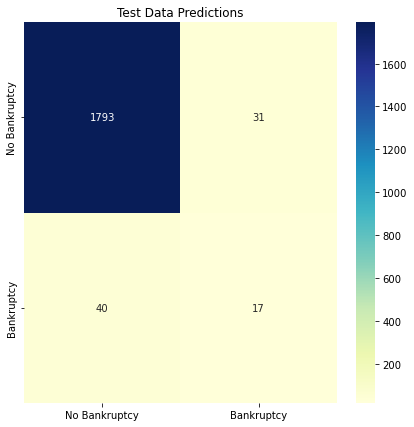



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1824
           1       0.35      0.30      0.32        57

    accuracy                           0.96      1881
   macro avg       0.67      0.64      0.65      1881
weighted avg       0.96      0.96      0.96      1881



In [48]:
def predict(model,x):
    pred  = model.predict(x)
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

def predict_graph(y_true,y_pred,title):
    cm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(7,7))
    sns.heatmap(cm,annot=True,fmt='g',cmap="YlGnBu",
                xticklabels=['No Bankruptcy','Bankruptcy'],yticklabels=['No Bankruptcy','Bankruptcy'])
    plt.title(title)
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_true,y_pred))


y_test_pred = predict(nn,X_test_pca)
predict_graph(y_test,y_test_pred,'Test Data Predictions')